# Penalized Regression
Ridge Regression

Lasso Regression

Wrap-up

In [253]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

from plotnine import *
from sklearn.model_selection import GridSearchCV
from numpy import arange

In [115]:
# Read the data
ames = pd.read_csv("AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100 #here we are looking for columns with less than 100 missing values and only keeping those
ames = ames.loc[:,good_cols] #only keeping good_cols

# Drop other NAs
ames = ames.dropna()

# Display all Columns
pd.set_option('display.max_columns', None)

# Sort Columns alphabetically
#ames = ames.sort_index(axis=1)

ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


# OLS Regression

In [116]:
# Setting up PipeLine
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1) #note these were dropped, as order is an idex and pID is key id
y = ames["SalePrice"]

#Preprocessor as a column transformer that dumifies, standardizes.
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # what does the handle_unkow = 'ignore' do? sparse, array, handle, ignores unknown cats to 0
    make_column_selector(dtype_include=object)), #note the make_column_selector(dtype_include=object) will return all columns that are string objects.
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number)) #this one returns all columns that have numbers
  ],
  remainder = "passthrough" # we are doing this because we are keeping all the other variables
)

#putting the preprocessor and model spec in the pipeline
lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [143]:
#Cross Validate
ols_scores = cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')
ols_scores

array([-1.80341142e+17, -1.32180167e+20, -1.53453532e+20, -5.08478464e+17,
       -8.31619642e+17])

In [159]:
#ols coeff
ols_model = lr_pipeline_1.fit(X,y)
ols_coef = ols_model.named_steps["linear_regression"].coef_
len(ols_coef)

259

The reason for the terrible r^2 values here is because we overfit the data and we got some really bad predictions.

The other thing that is happening is that relative to the number of samples, the predictors are too many and some betas are huge, making the predictions nonsense. HOW TO FIX?

# Ridge Regression

In [145]:
# Setting up PipeLine
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1) #note these were dropped, as order is an idex and pID is key id
y = ames["SalePrice"]

In [146]:
#Model Specification
ridge = Ridge(alpha=1)

#Preprocessor as a column transformer that dumifies, standardizes.
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # what does the handle_unkow = 'ignore' do? sparse, array, handle, ignores unknown cats to 0
    make_column_selector(dtype_include=object)), #note the make_column_selector(dtype_include=object) will return all columns that are string objects.
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number)) #this one returns all columns that have numbers
  ],
  remainder = "passthrough" # we are doing this because we are keeping all the other variables
)

#putting the preprocessor and model spec in the pipeline
ridge_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", ridge)]
)

In [149]:
#Cross Validating the Ridge Regression
ridge_scores1 = cross_val_score(ridge_pipeline_1, X, y, cv = 5, scoring = 'r2')
ridge_scores1

array([0.8983804 , 0.91749817, 0.79251623, 0.78248152, 0.91492025])

In [150]:
#fit the model on the whole dataset and get the coefficients.
ridge_model = ridge_pipeline_1.fit(X,y)

In [167]:
#Getting the Coefficients for the ridge model
ridge_coef = ridge_model.named_steps["ridge_regression"].coef_
len(ridge_coef)

259

## Comparing OLS and Ridge Cross Validated results

In [169]:
ridge_scores1

array([0.8983804 , 0.91749817, 0.79251623, 0.78248152, 0.91492025])

In [171]:
ols_scores

array([-1.80341142e+17, -1.32180167e+20, -1.53453532e+20, -5.08478464e+17,
       -8.31619642e+17])

Clearly the OLS scores were showcasing the incredibly overfit model. Ridge regression allowed us to bias the coefficients in such a way that they got a lot smaller.

In [156]:
#Make a plot of these coefficients compared to the ones from ordinary linear regression.
#creating data frame for plotting
full = pd.DataFrame({'ridge_coef': ridge_coef, 'ols_coef': ols_coef})
full

,ridge_coef,ols_coef
0,-5740.055372,4.298345e+13
1,1511.928887,4.298345e+13
2,-5809.704488,4.298345e+13
3,7676.327583,4.298345e+13
4,3215.393618,4.298345e+13
...,...,...
254,2937.762099,2.701250e+03
255,1377.194605,2.732000e+03
256,-4485.971545,-5.213625e+03
257,-674.189275,-6.990000e+02


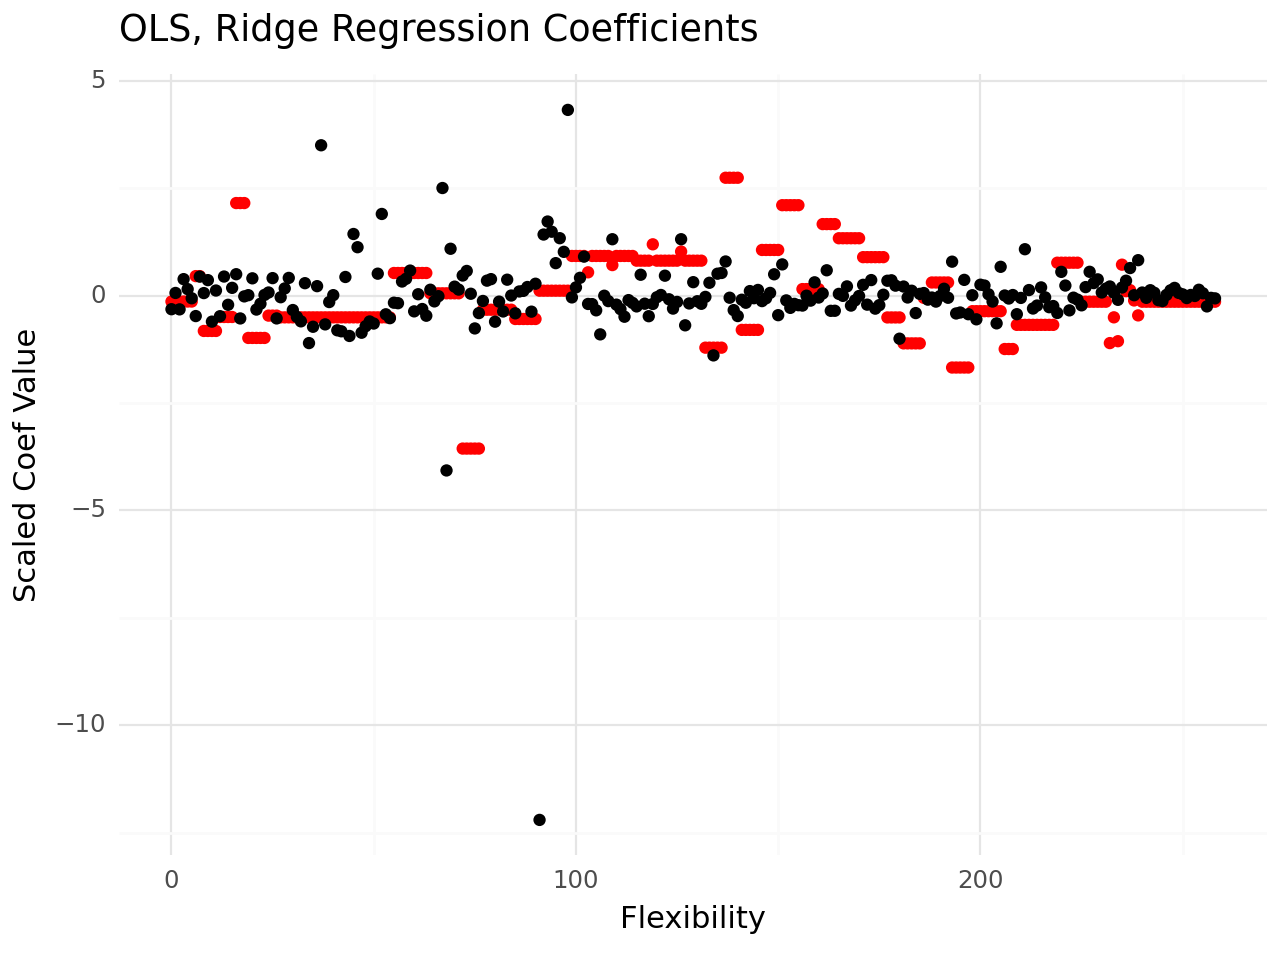

In [255]:
# Create a DataFrame with the coefficients
full = pd.DataFrame({
    'Flexibility': arange(0, 259),
    'ols_coef': ols_coef,
    'ridge_coef': ridge_coef
})

# Standardize the coefficients
scaler = StandardScaler()
full[['ridge_coef', 'ols_coef']] = scaler.fit_transform(full[['ridge_coef', 'ols_coef']])

# Plot creation
plot = (ggplot(full, aes(x="Flexibility"))
        + geom_point(aes(y='ols_coef'), color="red")
        + geom_point(aes(y='ridge_coef'), color="black")
        + theme_minimal()
        + labs(y="Scaled Coef Value", title='OLS, Ridge Regression Coefficients'))

# Display the plot
print(plot)

## Ridge Lambda Tuning

In [184]:
#Model Specification
ridge = Ridge()

#Preprocessor as a column transformer that dumifies, standardizes.
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # what does the handle_unkow = 'ignore' do? sparse, array, handle, ignores unknown cats to 0
    make_column_selector(dtype_include=object)), #note the make_column_selector(dtype_include=object) will return all columns that are string objects.
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number)) #this one returns all columns that have numbers
  ],
  remainder = "passthrough" # we are doing this because we are keeping all the other variables
)

#putting the preprocessor and model spec in the pipeline
ridge_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", ridge)]
)

In [207]:
#tuning using grid Search
alpha = {'ridge_regression__alpha': [.0001, .001, .01, .1, 1, 10]}

gscv = GridSearchCV(ridge_pipeline_1, alpha, cv = 5, scoring='r2')

gscv_fitted = gscv.fit(X, y)
mean_test_scores = gscv_fitted.cv_results_['mean_test_score']
alphas = gscv_fitted.cv_results_['param_ridge_regression__alpha']

# Creating a DataFrame with degrees and scores
model_scores = pd.DataFrame(data = {"lambdas": alphas, "scores": mean_test_scores}).sort_values(by='scores', ascending=False)
model_scores

,lambdas,scores
5,10,0.863355
4,1,0.861159
3,0.1,0.855423
2,0.01,0.853224
1,0.001,0.852945
0,0.0001,0.852917


After tuning the ridge model we find that the best Lambda to use is 10.

# LASSO Regression

In [205]:
#Model Specification
lasso = Lasso()

#Preprocessor as a column transformer that dumifies, standardizes.
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # what does the handle_unkow = 'ignore' do? sparse, array, handle, ignores unknown cats to 0
    make_column_selector(dtype_include=object)), #note the make_column_selector(dtype_include=object) will return all columns that are string objects.
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number)) #this one returns all columns that have numbers
  ],
  remainder = "passthrough" # we are doing this because we are keeping all the other variables
)

#putting the preprocessor and model spec in the pipeline
lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", lasso)]
)

## LASSO Tuning

In [209]:
import warnings
warnings.filterwarnings('ignore')

#tuning using grid Search
alpha = {'lasso_regression__alpha': [.0001, .001, .01, .1, 1, 10]}

gscv = GridSearchCV(lasso_pipeline_1, alpha, cv = 5, scoring='r2')

gscv_fitted = gscv.fit(X, y)
mean_test_scores = gscv_fitted.cv_results_['mean_test_score']
alphas = gscv_fitted.cv_results_['param_lasso_regression__alpha']

# Creating a DataFrame with degrees and scores
model_scores = pd.DataFrame(data = {"lambdas": alphas, "scores": mean_test_scores}).sort_values(by='scores', ascending=False)
model_scores

,lambdas,scores
5,10,0.859495
4,1,0.855890
3,0.1,0.855394
2,0.01,0.854549
1,0.001,0.854440
0,0.0001,0.854428


The best lambda for the lasso regression here is also 10 as it was for Ridge.

In [210]:
#Best lambda pipeline
#Model Specification
lasso = Lasso(alpha = 10)

#Preprocessor as a column transformer that dumifies, standardizes.
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # what does the handle_unkow = 'ignore' do? sparse, array, handle, ignores unknown cats to 0
    make_column_selector(dtype_include=object)), #note the make_column_selector(dtype_include=object) will return all columns that are string objects.
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number)) #this one returns all columns that have numbers
  ],
  remainder = "passthrough" # we are doing this because we are keeping all the other variables
)

#putting the preprocessor and model spec in the pipeline
lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", lasso)]
)

lasso_model = lasso_pipeline_1.fit(X,y)

lasso_coef = lasso_model.named_steps["lasso_regression"].coef_


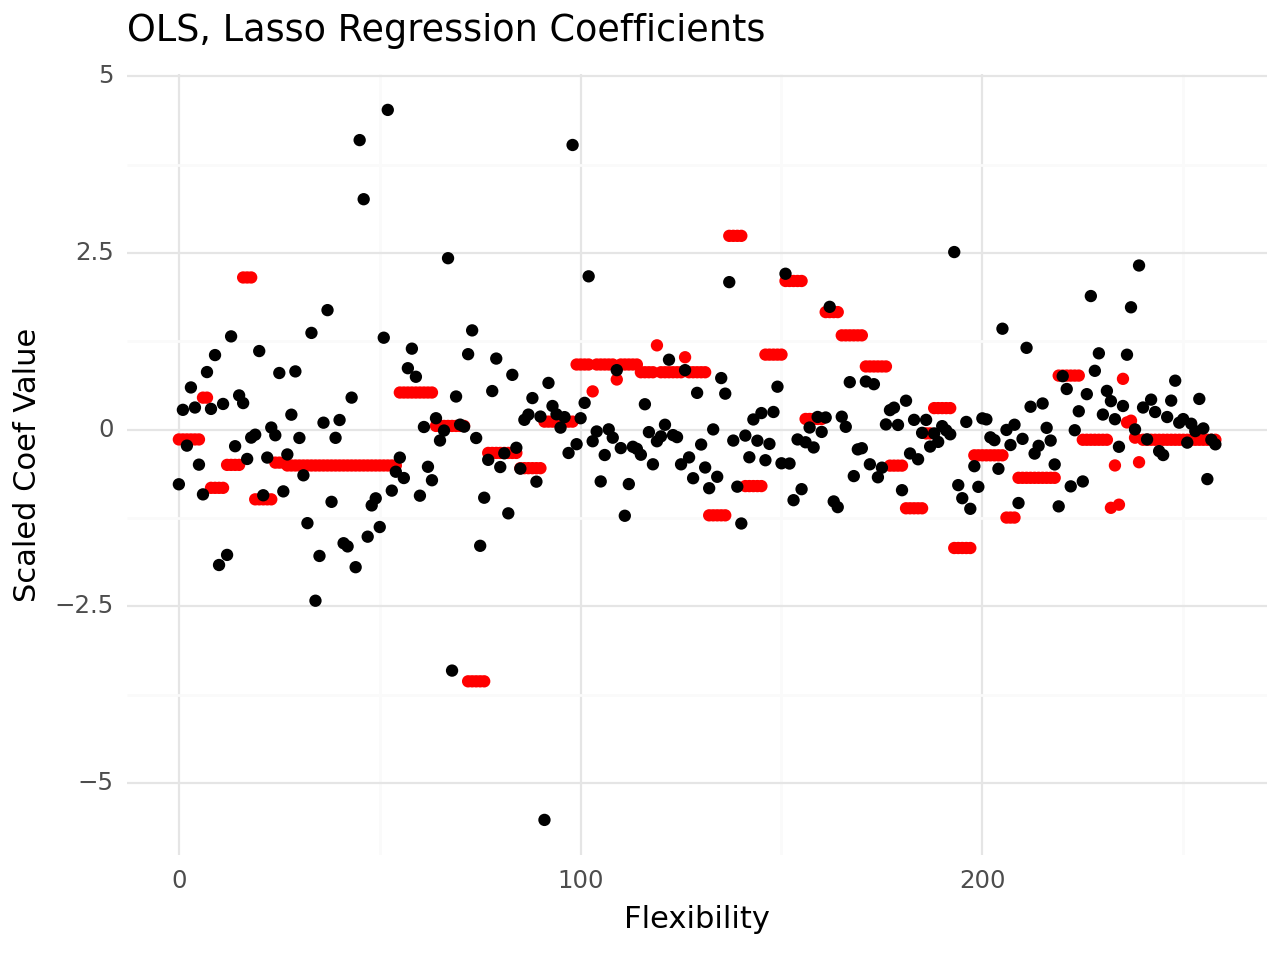

In [252]:
# Create a DataFrame with the coefficients
full = pd.DataFrame({
    'Flexibility': arange(0, 259),
    'ols_coef': ols_coef,
    'lasso_coef': enet_coef
})

# Standardize the coefficients
scaler = StandardScaler()
full[['lasso_coef', 'ols_coef']] = scaler.fit_transform(full[['lasso_coef', 'ols_coef']])

# Plot creation
plot = (ggplot(full, aes(x="Flexibility"))
        + geom_point(aes(y='ols_coef'), color="red")
        + geom_point(aes(y='lasso_coef'), color="black")
        + theme_minimal()
        + labs(y="Scaled Coef Value", title='OLS, Lasso Regression Coefficients'))

# Display the plot
print(plot)

# Elastic Net

In [214]:
#Best enet pipeline

#Model Specification
enet = ElasticNet()

#Preprocessor as a column transformer that dumifies, standardizes.
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # what does the handle_unkow = 'ignore' do? sparse, array, handle, ignores unknown cats to 0
    make_column_selector(dtype_include=object)), #note the make_column_selector(dtype_include=object) will return all columns that are string objects.
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number)) #this one returns all columns that have numbers
  ],
  remainder = "passthrough" # we are doing this because we are keeping all the other variables
)

#putting the preprocessor and model spec in the pipeline
enet_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("enet_regression", enet)]
)

In [235]:
#tuning using grid Search
params = {'enet_regression__alpha': [.0001, .001, .01, .1, 1, 10],
          'enet_regression__l1_ratio': [.1, .2, .4, .6, .8, .9]}

gscv = GridSearchCV(enet_pipeline_1, params, cv = 5, scoring='r2')

gscv_fitted = gscv.fit(X, y)

In [228]:
mean_test_scores = gscv_fitted.cv_results_['mean_test_score']
alphas = gscv_fitted.cv_results_['param_enet_regression__alpha']
ratios = gscv_fitted.cv_results_['param_enet_regression__l1_ratio']

# Creating a DataFrame with degrees and scores
model_scores = pd.DataFrame(data = {"lambda": alphas, "alpha": ratios, "scores": mean_test_scores}).sort_values(by='scores', ascending=False)
model_scores.head()

,lambda,alpha,scores
15,0.01,0.6,0.863350
14,0.01,0.4,0.863279
13,0.01,0.2,0.863049
16,0.01,0.8,0.863035
12,0.01,0.1,0.862903


In [236]:
#Best enet pipeline

#Model Specification
enet = ElasticNet(alpha=0.01, l1_ratio=0.6)

#Preprocessor as a column transformer that dumifies, standardizes.
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # what does the handle_unkow = 'ignore' do? sparse, array, handle, ignores unknown cats to 0
    make_column_selector(dtype_include=object)), #note the make_column_selector(dtype_include=object) will return all columns that are string objects.
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number)) #this one returns all columns that have numbers
  ],
  remainder = "passthrough" # we are doing this because we are keeping all the other variables
)

#putting the preprocessor and model spec in the pipeline
enet_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("enet_regression", enet)]
)

In [246]:
enet_model = enet_pipeline_1.fit(X,y)

enet_coef = enet_model.named_steps["enet_regression"].coef_

In [247]:
len(enet_coef)

259

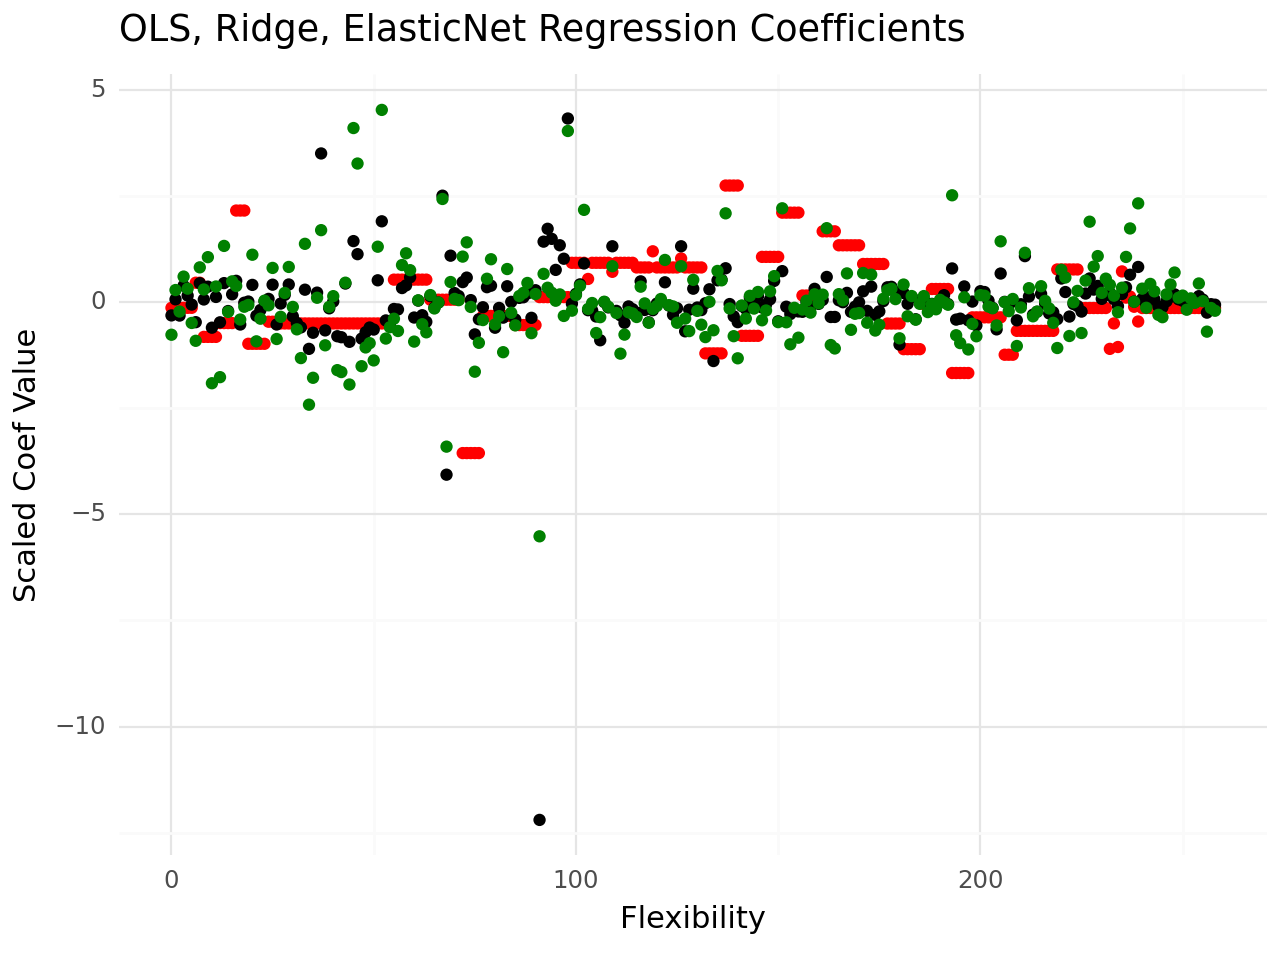

In [257]:
# Create a DataFrame with the coefficients
full = pd.DataFrame({
    'Flexibility': arange(0, 259),
    'ridge_coef': ridge_coef,
    'ols_coef': ols_coef,
    'enet_coef': enet_coef
})

# Standardize the coefficients
scaler = StandardScaler()
full[['ridge_coef', 'ols_coef', 'enet_coef']] = scaler.fit_transform(full[['ridge_coef', 'ols_coef', 'enet_coef']])

# Plot creation
plot = (ggplot(full, aes(x="Flexibility"))
        + geom_point(full, aes(y='ols_coef'), color="red")
        + geom_point(full, aes(y='ridge_coef'), color="black")
        + geom_point(full, aes(y='enet_coef'), color="green")
        + theme_minimal()
        + labs(y="Scaled Coef Value", title='OLS, Ridge, ElasticNet Regression Coefficients'))

# Display the plot
print(plot)